# Instructor Do: Decision Trees

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image


## Loading and Preprocessing Loans Encoded Data

In [2]:
# Loading data
file_path = Path("Resources/loans_data_encoded.csv")
df_loans = pd.read_csv(file_path)
df_loans.head()

,amount,term,age,bad,month_num,gender_female,gender_male,education_Bachelor,education_High School or Below,education_Master or Above,education_college
0,1000,30,45,0,6,0,1,0,1,0,0
1,1000,30,50,0,7,1,0,1,0,0,0
2,1000,30,33,0,8,1,0,1,0,0,0
3,1000,15,27,0,9,0,1,0,0,0,1
4,1000,30,28,0,10,1,0,0,0,0,1


In [3]:
# Define features set
X = df_loans.copy()
X.drop("bad", axis=1, inplace=True)
X.head()

,amount,term,age,month_num,gender_female,gender_male,education_Bachelor,education_High School or Below,education_Master or Above,education_college
0,1000,30,45,6,0,1,0,1,0,0
1,1000,30,50,7,1,0,1,0,0,0
2,1000,30,33,8,1,0,1,0,0,0
3,1000,15,27,9,0,1,0,0,0,1
4,1000,30,28,10,1,0,0,0,0,1


In [5]:
# Define target vector
y = df_loans['bad'].values.reshape(-1,1)
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [6]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [8]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [9]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Decision Tree Model

In [10]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [11]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

## Making Predictions Using the Tree Model

In [12]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)
predictions

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0])

## Model Evaluation

In [13]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"],
    columns=['Predicted 0', 'Predicted 1']
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions
                          )
cm_df

,Predicted 0,Predicted 1
Actual 0,53,31
Actual 1,21,20


In [14]:
# Displaying results
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.63      0.67        84
           1       0.39      0.49      0.43        41

    accuracy                           0.58       125
   macro avg       0.55      0.56      0.55       125
weighted avg       0.61      0.58      0.59       125



## Visualizing the Decision Tree

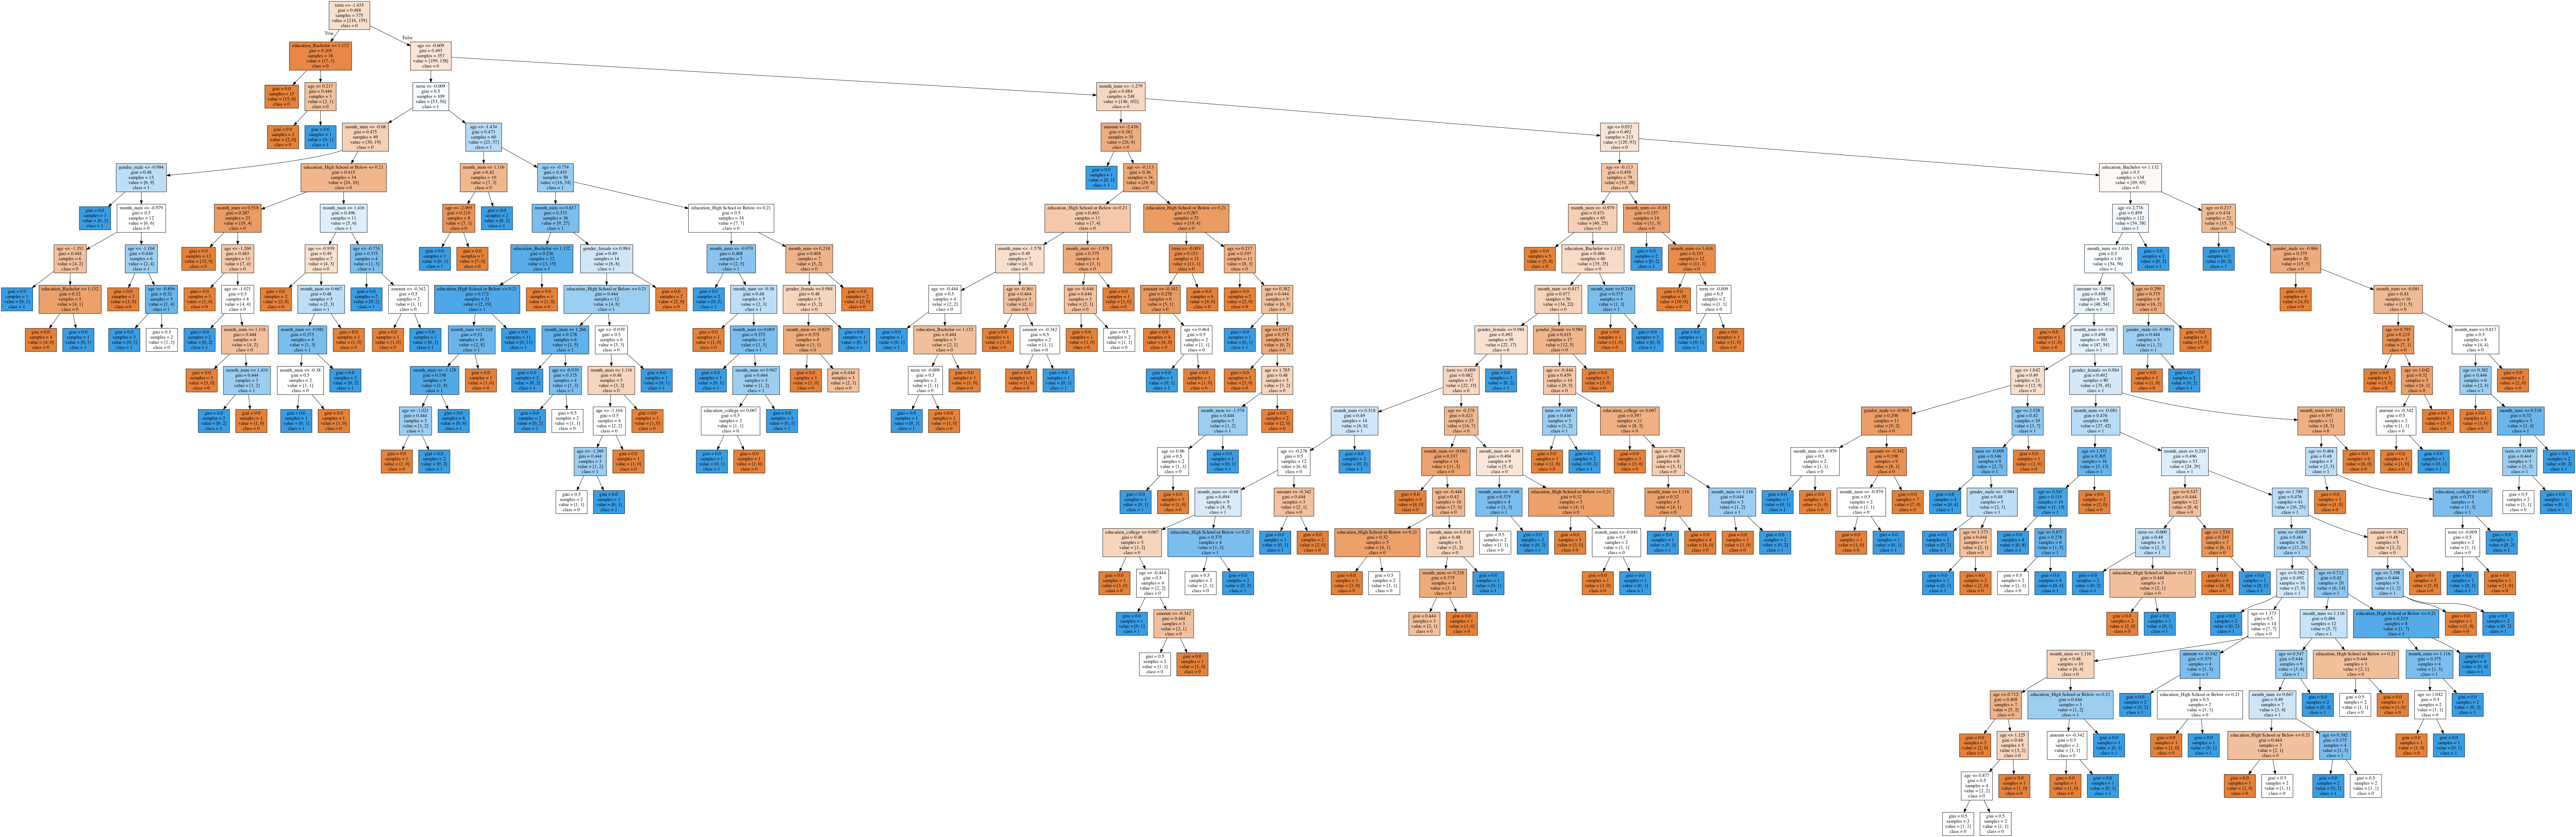

In [15]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=['0', '1'], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph

Image(graph.create_png())

In [16]:
# Saving the tree as PDF
file_path = ("Resources/loans_tree.pdf")
graph.write_pdf(file_path)

# Saving the tree as PNG
file_path = ("Resources/loans_tree.png")
graph.write_png(file_path)


True